In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set(style="whitegrid")

In [23]:
root = '/data0/lucy/ingroup_lang/'
path = root + 'logs/pmi/'

In [24]:
count_cut_off = 30
pmi_cut_off = 0.8

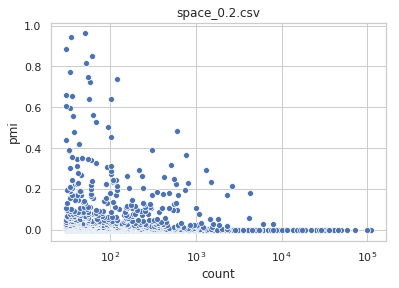

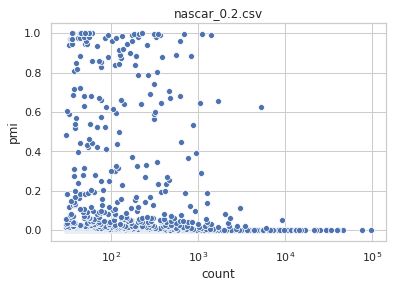

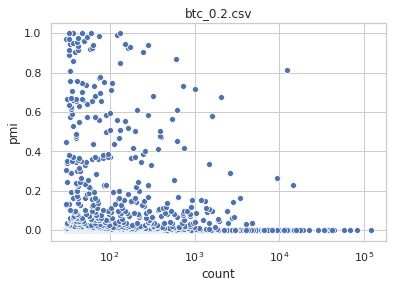

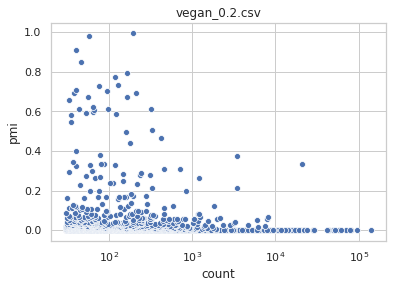

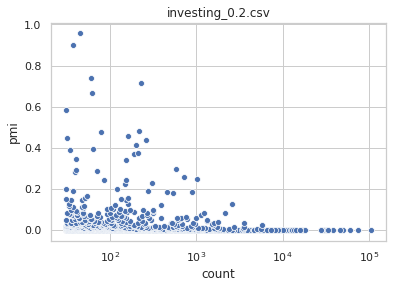

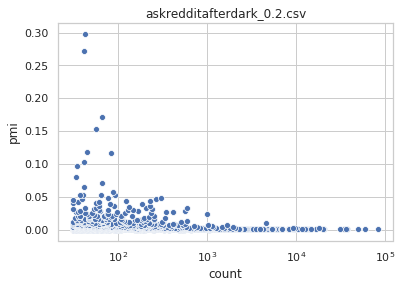

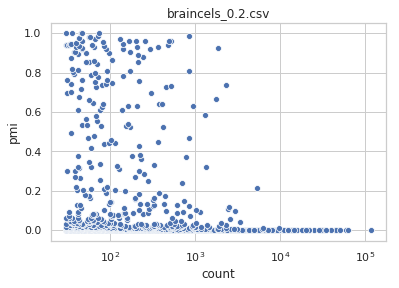

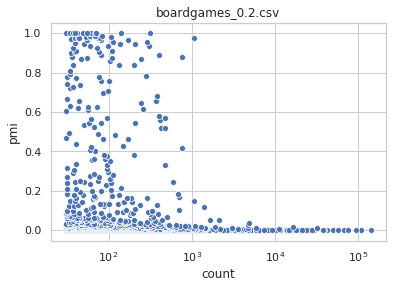

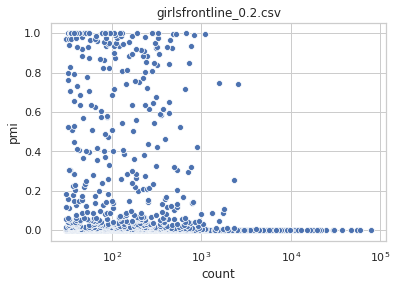

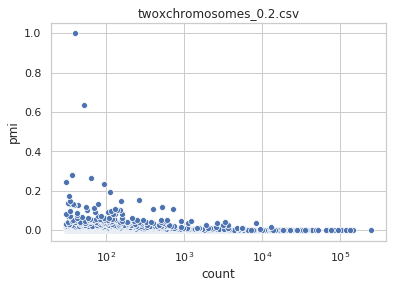

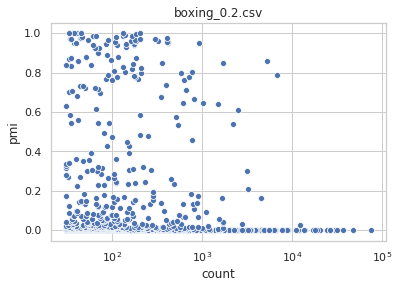

In [16]:
i = 0
for f in os.listdir(path): 
    if not f.endswith('.csv'): continue
    df = pd.read_csv(path + f, engine='python')
    df = df[df['count'] > count_cut_off]
    p = sns.scatterplot(x='count', y='pmi', data=df)
    p.figure.get_axes()[0].set_xscale('log')
    plt.title(f)
    plt.show()
    i += 1
    if i > 10: break

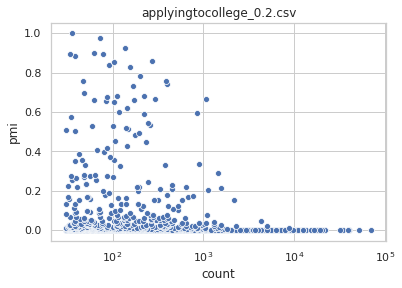

In [26]:
f = 'applyingtocollege_0.2.csv'
df = pd.read_csv(path + f, engine='python')
df = df[df['count'] > count_cut_off]
p = sns.scatterplot(x='count', y='pmi', data=df)
p.figure.get_axes()[0].set_xscale('log')
plt.title(f)
plt.show()

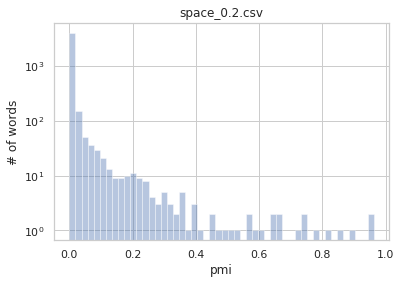

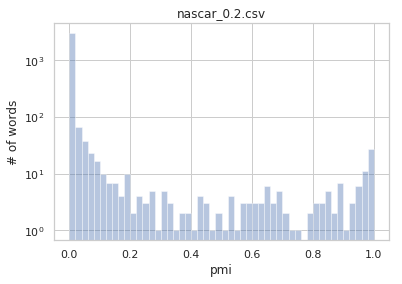

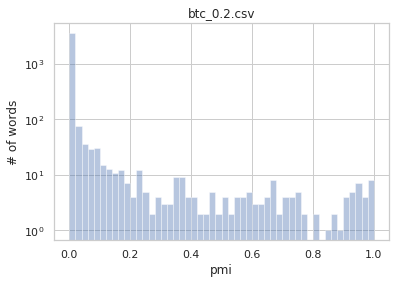

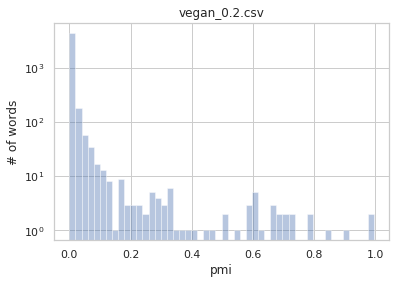

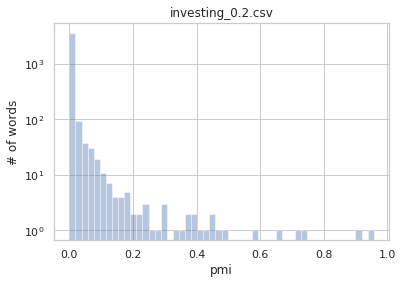

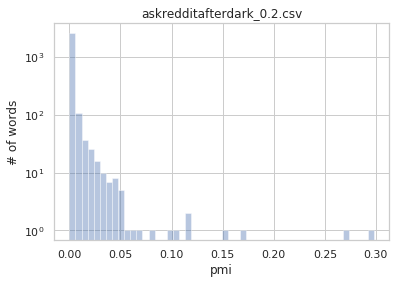

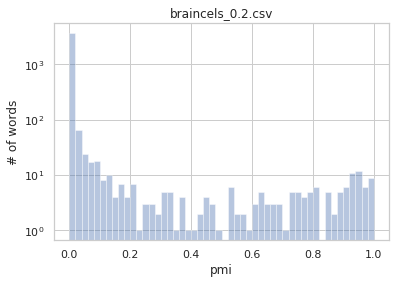

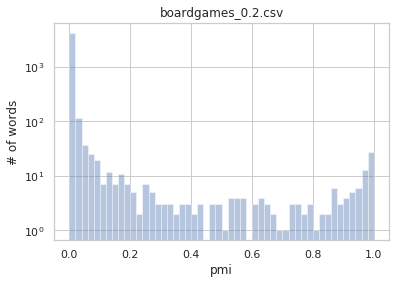

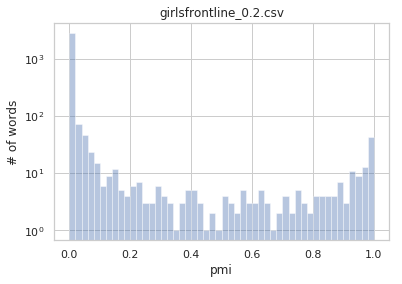

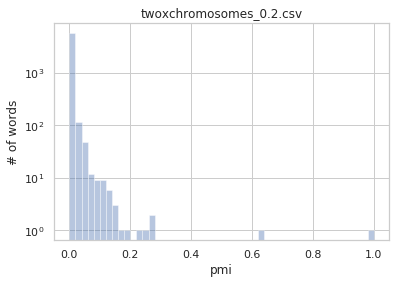

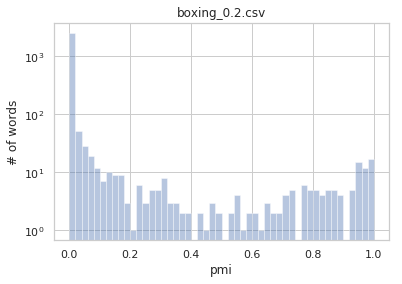

In [17]:
i = 0
for f in os.listdir(path): 
    if not f.endswith('.csv'): continue
    df = pd.read_csv(path + f, engine='python')
    df = df[df['count'] > count_cut_off]
    p = sns.distplot(a=df['pmi'], kde=False)
    plt.yscale('log')
    plt.ylabel('# of words')
    plt.title(f)
    plt.show()
    i += 1
    if i > 10: break

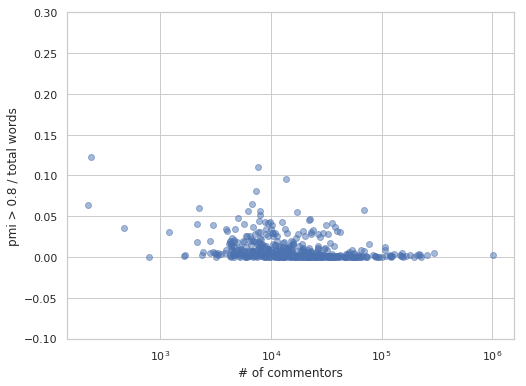

In [27]:
# number of words with pmi > pmi_cut_off / total number of unique words (that occur with frequency > 20% in each subreddit)
# number of commenters
commentor_path = root + 'logs/commentor_counts/part-00000-f83d5d87-c50d-4d5a-a560-e978e85e0af8-c000.csv'
sr_ncoms = pd.read_csv(commentor_path, engine='python').set_index('subreddit').T.to_dict('list')
suffix = '_0.2.csv'
y = []
x = []
srs = []
for f in os.listdir(path): 
    if not f.endswith('.csv'): continue
    subreddit = f.replace(suffix, '')
    df = pd.read_csv(path + f, engine='python')
    notable_words = df[df['count'] > count_cut_off]
    num_words = len(notable_words)
    high_pmi_df = notable_words[notable_words['pmi'] > pmi_cut_off]
    num_high_pmi = len(high_pmi_df)
    pmi_score = num_high_pmi / float(num_words)
    y.append(pmi_score)
    x.append(sr_ncoms[subreddit][0])
    srs.append(subreddit)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xscale('log')
plt.ylabel('pmi > 0.8 / total words')
plt.xlabel('# of commentors')
plt.ylim(-0.1, 0.3)
plt.show()

In [28]:
'''
meme economy is entirely numbers
market76 is full of user names
hardwareswap is full of timestamps
jobuds (which is a nsfw subreddit) I think has usernames without u/
market76 has a bunch of uesrnames that aren't reddit but instead [PS4] IGN: Mastabata69
'''
for i, val in enumerate(y): 
    if val > 0.1: 
        print(srs[i], x[i], y[i])

('fakecollegefootball', 239, 0.12287334593572778)
('market76', 7731, 0.11022752374641043)


In [14]:
"""
transcribersofreddit might be bots
fakecollegefootball is just weird, has stuff like bji09c from datatags generated by bots
counting has things like a5 with high counts due to counting chess matches 
"""
for i, val in enumerate(x): 
    if val < 1000: 
        print(srs[i], x[i], y[i])

('centerleftpolitics', 794, 0.0009053050878145935)
('fakecollegefootball', 239, 0.12287334593572778)
('counting', 471, 0.03691813804173355)
('transcribersofreddit', 222, 0.05670680481657799)
